In [ ]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.5 MB/s eta 0:00:00


In [ ]:
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

In [ ]:
# Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)             # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])        # Apply Hadamard to both qubits

# Step 3: Apply the oracle
qc.barrier()
deutsch_oracle(qc, function_type)

In [ ]:
# Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the first qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))

           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 


In [ ]:
# Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Interpret result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


Measurement results: {'1': 1024}
→ Function is BALANCED.


In [ ]:
function_types = ['constant_0', 'constant_1', 'balanced_0', 'balanced_1']

for current_function_type in function_types:
    function_type = current_function_type
    print(f"\n--- Running Deutsch's Algorithm for function type: {function_type} ---")

    # Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)

    # Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
    qc.x(1)             # Set output qubit to |1>
    qc.barrier()
    qc.h([0, 1])        # Apply Hadamard to both qubits

    # Step 3: Apply the oracle
    qc.barrier()
    deutsch_oracle(qc, function_type)

    # Step 4: Apply Hadamard to input qubit
    qc.barrier()
    qc.h(0)

    # Step 5: Measure the first qubit
    qc.measure(0, 0)

    # Step 6: Simulate
    sim = AerSimulator()
    qc_compiled = transpile(qc, sim)
    result = sim.run(qc_compiled).result()
    counts = result.get_counts()

    print("Measurement results:", counts)

    # Interpret result
    if list(counts.keys())[0] == '0':
        print("→ Function is CONSTANT.")
    else:
        print("→ Function is BALANCED.")


--- Running Deutsch's Algorithm for function type: constant_0 ---
Measurement results: {'0': 1024}
→ Function is CONSTANT.

--- Running Deutsch's Algorithm for function type: constant_1 ---
Measurement results: {'0': 1024}
→ Function is CONSTANT.

--- Running Deutsch's Algorithm for function type: balanced_0 ---
Measurement results: {'1': 1024}
→ Function is BALANCED.

--- Running Deutsch's Algorithm for function type: balanced_1 ---
Measurement results: {'1': 1024}
→ Function is BALANCED.



--- Running Deutsch's Algorithm for function type: constant_0 ---
Measurement results: {'0': 1024}
→ Function is CONSTANT.

--- Visualizing Quantum State for function type: constant_0 ---


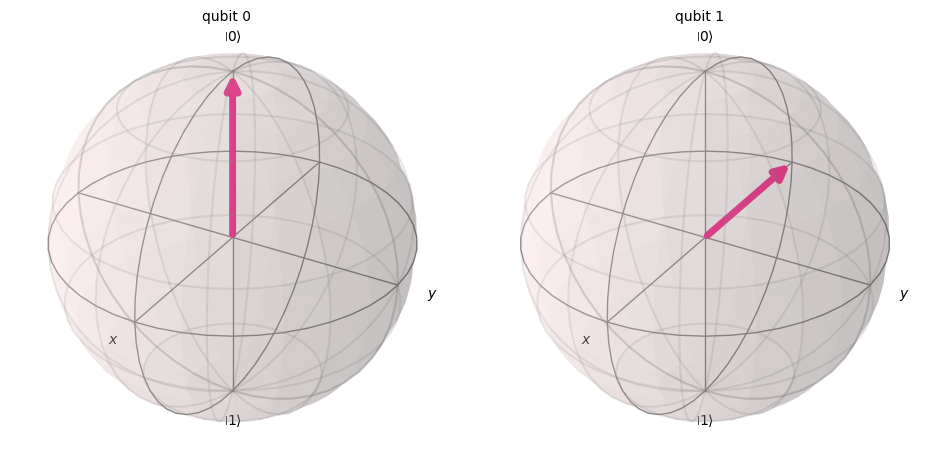


--- Running Deutsch's Algorithm for function type: constant_1 ---
Measurement results: {'0': 1024}
→ Function is CONSTANT.

--- Visualizing Quantum State for function type: constant_1 ---


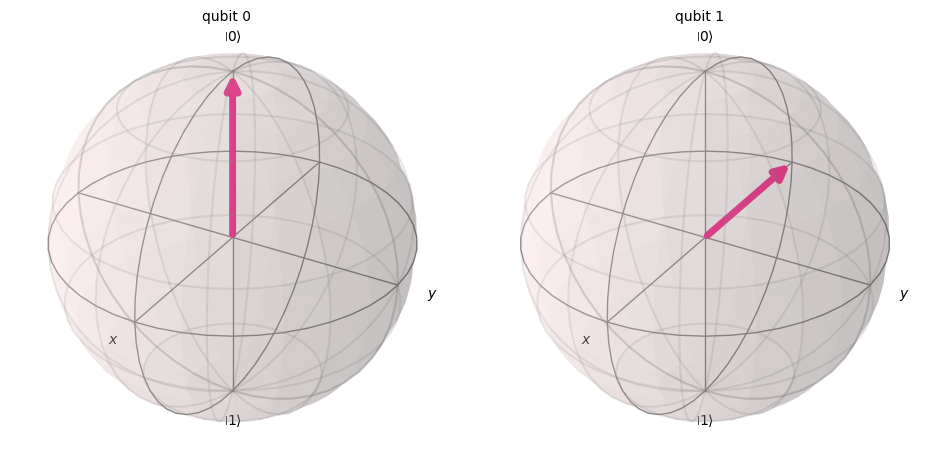


--- Running Deutsch's Algorithm for function type: balanced_0 ---
Measurement results: {'1': 1024}
→ Function is BALANCED.

--- Visualizing Quantum State for function type: balanced_0 ---


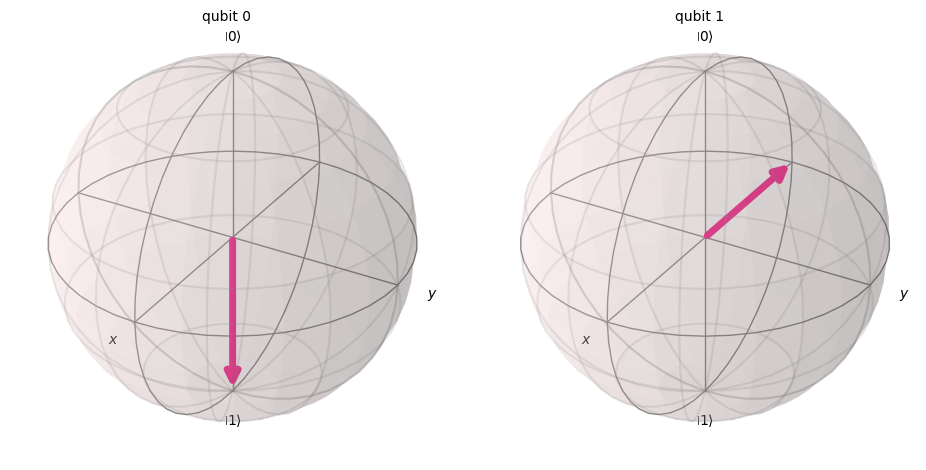


--- Running Deutsch's Algorithm for function type: balanced_1 ---
Measurement results: {'1': 1024}
→ Function is BALANCED.

--- Visualizing Quantum State for function type: balanced_1 ---


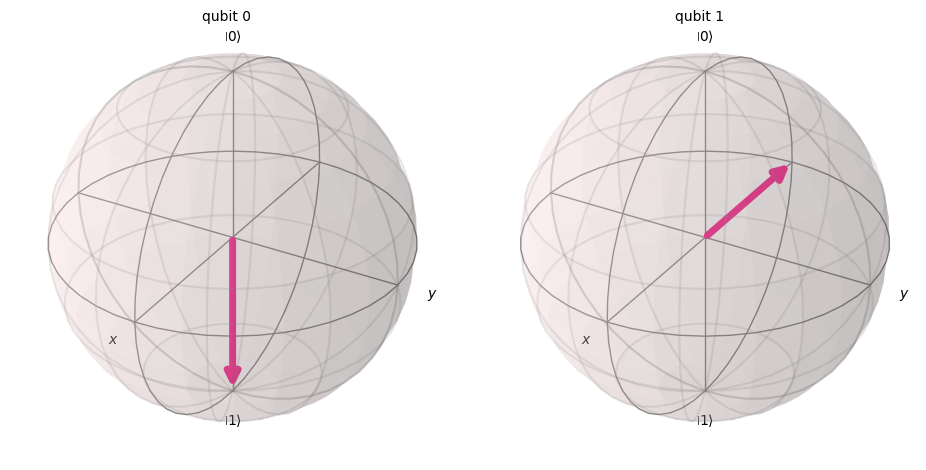

In [ ]:
#TASKS
#Adding all the python functions in a list and looping through them and visualizing it
function_types = ['constant_0', 'constant_1', 'balanced_0', 'balanced_1']

for current_function_type in function_types:
    function_type = current_function_type
    print(f"\n--- Running Deutsch's Algorithm for function type: {function_type} ---")

    # Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)

    # Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
    qc.x(1)             # Set output qubit to |1>
    qc.barrier()
    qc.h([0, 1])        # Apply Hadamard to both qubits

    # Step 3: Apply the oracle
    qc.barrier()
    deutsch_oracle(qc, function_type)

    # Step 4: Apply Hadamard to input qubit
    qc.barrier()
    qc.h(0)

    # Step 5: Measure the first qubit
    qc.measure(0, 0)

    # Step 6: Simulate
    sim = AerSimulator()
    qc_compiled = transpile(qc, sim)
    result = sim.run(qc_compiled).result()
    counts = result.get_counts()

    print("Measurement results:", counts)

    # Interpret result
    if list(counts.keys())[0] == '0':
        print("→ Function is CONSTANT.")
    else:
        print("→ Function is BALANCED.")

    print(f"\n--- Visualizing Quantum State for function type: {function_type} ---")
    # Create a new circuit for visualization, copying operations from qc up to before the measurement
    qc_viz = QuantumCircuit(2, 1) # Same qubits and classical bits as original

    # Re-apply the initial setup (assuming it's consistent)
    qc_viz.x(1)             # Set output qubit to |1>
    qc_viz.barrier(label='initialization')
    qc_viz.h([0, 1])        # Apply Hadamard to both qubits

    # Apply the oracle
    qc_viz.barrier(label='oracle')
    deutsch_oracle(qc_viz, function_type)

    # Apply Hadamard to input qubit (without measurement)
    qc_viz.barrier(label='final_hadamard')
    qc_viz.h(0)

    # Calculate the statevector
    statevector = Statevector(qc_viz)

    # Visualize on Bloch sphere
    display(plot_bloch_multivector(statevector))


--- Implementing Deutsch's Algorithm for f(x) = x XOR 1 ---

--- Bloch Sphere after Initial State Preparation ---


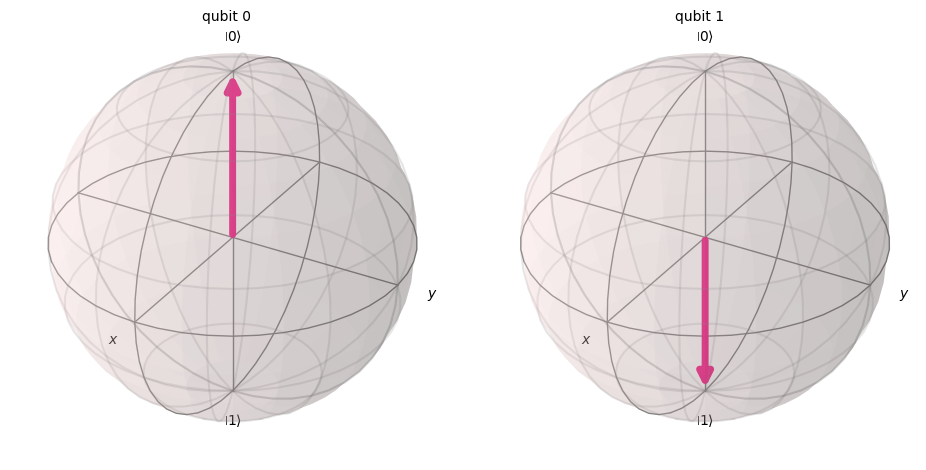


--- Bloch Sphere after Initial Hadamard Gates ---


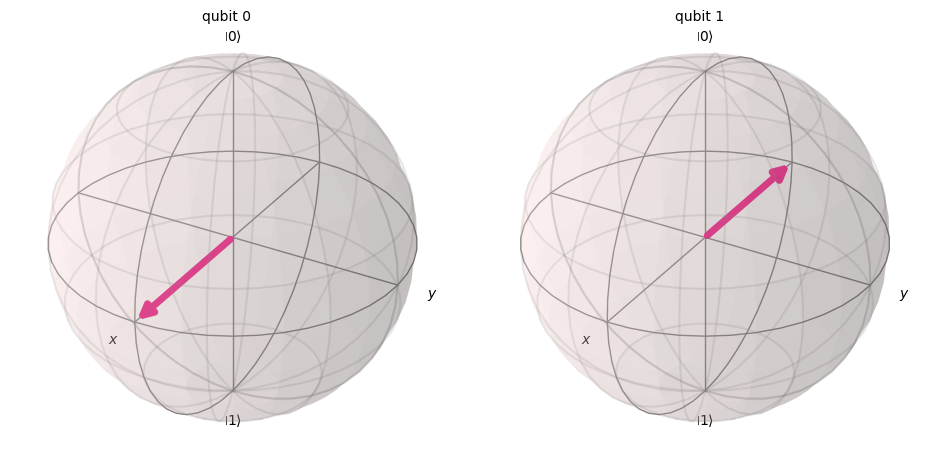


--- Bloch Sphere after Oracle Application (f(x) = x XOR 1) ---


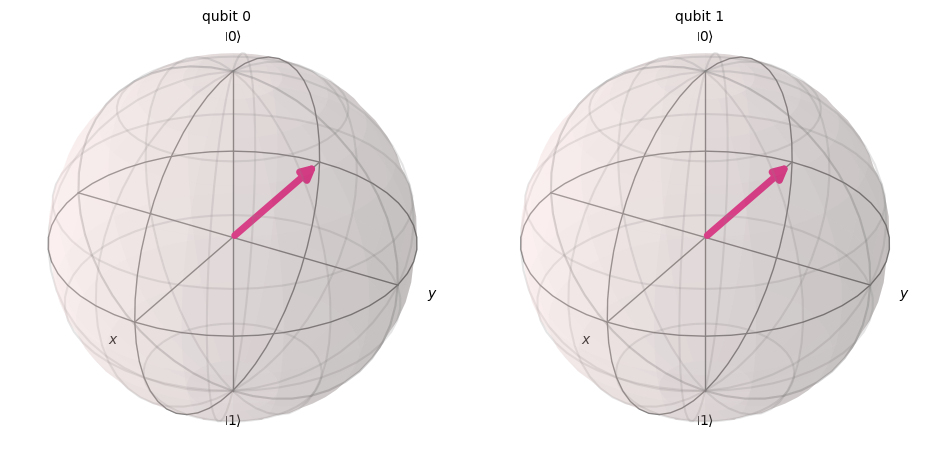


--- Bloch Sphere after Final Hadamard Gate (before measurement) ---


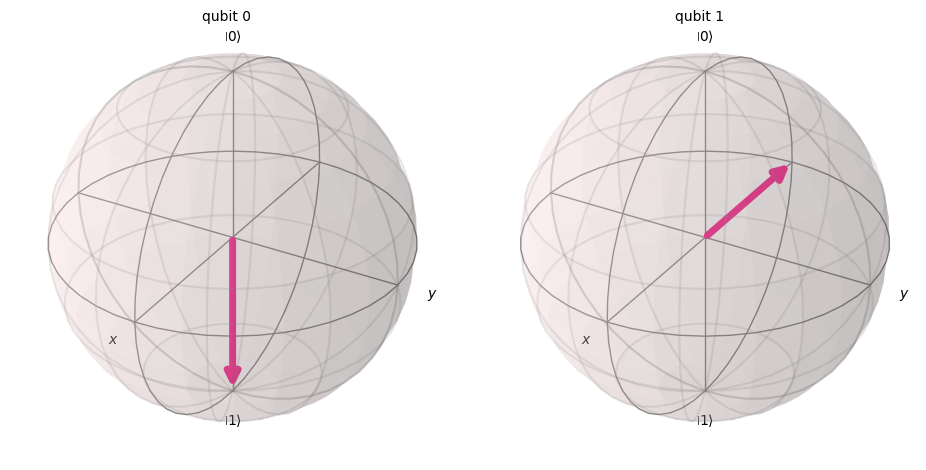


--- Full Circuit Diagram for f(x) = x XOR 1 ---
           initial_state_prep ┌───┐ initial_Hadamards ┌───┐     ┌───┐»
q_0: ──────────────░──────────┤ H ├─────────░─────────┤ X ├──■──┤ X ├»
     ┌───┐         ░          ├───┤         ░         └───┘┌─┴─┐└───┘»
q_1: ┤ X ├─────────░──────────┤ H ├─────────░──────────────┤ X ├─────»
     └───┘         ░          └───┘         ░              └───┘     »
c: 1/════════════════════════════════════════════════════════════════»
                                                                     »
«      oracle_application ┌───┐ final_Hadamard ┌─┐
«q_0: ─────────░──────────┤ H ├───────░────────┤M├
«              ░          └───┘       ░        └╥┘
«q_1: ─────────░──────────────────────░─────────╫─
«              ░                      ░         ║ 
«c: 1/══════════════════════════════════════════╩═
«                                               0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


In [51]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display
#Task: Modify the oracle to implement a new function f(x) = x XOR 1.
#Verify whether it is detected as constant or balanced.
# 1. Define a Python function named oracle_x_xor_1
def oracle_x_xor_1(qc):
    """Implements the oracle for f(x) = x XOR 1 (equivalent to NOT(x))."""

    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)

print("--- Implementing Deutsch's Algorithm for f(x) = x XOR 1 ---")

# 2. Initialize a new QuantumCircuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# 3. Prepare the initial state by applying an X gate to qubit 1
qc.x(1)             # Set output qubit to |1>

# 4. Create a copy of the circuit at this point for visualization
qc_viz_initial_state = qc.copy(name='initial_state')
qc.barrier(label='initial_state_prep')

# Visualize 1: After initial state preparation
print("\n--- Bloch Sphere after Initial State Preparation ---")
statevector_initial_state = Statevector(qc_viz_initial_state)
display(plot_bloch_multivector(statevector_initial_state))

# 5. Apply Hadamard gates to both qubit 0 and qubit 1
qc.h([0, 1])        # Apply Hadamard to both qubits

# 6. Create a copy of the circuit at this point for visualization
qc_viz_after_h = qc.copy(name='after_Hadamards')
qc.barrier(label='initial_Hadamards')

# Visualize 2: After initial Hadamard gates
print("\n--- Bloch Sphere after Initial Hadamard Gates ---")
statevector_after_h = Statevector(qc_viz_after_h)
display(plot_bloch_multivector(statevector_after_h))

# 7. Apply the oracle_x_xor_1 function to the circuit
oracle_x_xor_1(qc)

# 8. Create a copy of the circuit at this point for visualization
qc_viz_after_oracle = qc.copy(name='after_oracle')
qc.barrier(label='oracle_application')

# Visualize 3: After oracle application
print("\n--- Bloch Sphere after Oracle Application (f(x) = x XOR 1) ---")
statevector_after_oracle = Statevector(qc_viz_after_oracle)
display(plot_bloch_multivector(statevector_after_oracle))

# 9. Apply a Hadamard gate to qubit 0 (the input qubit)
qc.h(0)

# 10. Create a copy of the circuit at this point for visualization
qc_viz_final_h = qc.copy(name='final_Hadamard')
qc.barrier(label='final_Hadamard')

# Visualize 4: After final Hadamard gate (before measurement)
print("\n--- Bloch Sphere after Final Hadamard Gate (before measurement) ---")
statevector_final_h = Statevector(qc_viz_final_h)
display(plot_bloch_multivector(statevector_final_h))

# 11. Measure qubit 0 into classical bit 0
qc.measure(0, 0)

# 12. Print the complete quantum circuit diagram
print("\n--- Full Circuit Diagram for f(x) = x XOR 1 ---")
print(qc.draw(output="text"))

# 13. Initialize an AerSimulator and transpile the circuit for simulation
sim = AerSimulator()
qc_compiled = transpile(qc, sim)

# 14. Run the transpiled circuit on the simulator and get the measurement results
result = sim.run(qc_compiled).result()
counts = result.get_counts()

# 15. Print the measurement results
print("\nMeasurement results:", counts)

# 16. Interpret the measurement result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

In [54]:

from qiskit import QuantumCircuit

def dj_oracle_2qubit(qc, function_type):
    """Implements oracles for 2-qubit input functions for the Deutsch-Jozsa algorithm."""
    # Qubits are assumed to be: input_q0, input_q1, output_q
    # So, input qubits are 0 and 1, output qubit is 2.

    if function_type == 'constant_0':
        # f(x0, x1) = 0 --> Do nothing to the output qubit
        pass
    elif function_type == 'constant_1':
        # f(x0, x1) = 1 --> Apply X on the output qubit
        qc.x(2)
    elif function_type == 'balanced_x0':
        # f(x0, x1) = x0 --> CNOT(control=q0, target=q2)
        qc.cx(0, 2)
    elif function_type == 'balanced_x1':
        # f(x0, x1) = x1 --> CNOT(control=q1, target=q2)
        qc.cx(1, 2)
    elif function_type == 'balanced_x0_xor_x1':
        # f(x0, x1) = x0 XOR x1 --> CNOT(q0, q2) then CNOT(q1, q2)
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif function_type == 'balanced_x0_xor_1':
        # f(x0, x1) = x0 XOR 1 (equivalent to NOT(x0))
        qc.x(2) # Flip output qubit for f(x)=1
        qc.cx(0, 2) # Apply CNOT based on x0
        qc.x(2) # Flip output qubit back
    elif function_type == 'balanced_x1_xor_1':
        # f(x0, x1) = x1 XOR 1 (equivalent to NOT(x1))
        qc.x(2) # Flip output qubit for f(x)=1
        qc.cx(1, 2) # Apply CNOT based on x1
        qc.x(2) # Flip output qubit back
    elif function_type == 'balanced_x0_xor_x1_xor_1':
        # f(x0, x1) = (x0 XOR x1) XOR 1 (equivalent to NOT(x0 XOR x1))
        qc.x(2) # Flip output qubit for f(x)=1
        qc.cx(0, 2)
        qc.cx(1, 2)
        qc.x(2) # Flip output qubit back
    else:
        raise ValueError(f"Unknown function type: {function_type}")



In [53]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# 1. Choose one of the defined 2-qubit function types
dj_function_type = 'balanced_x0_xor_x1'
# dj_function_type = 'constant_0' # Uncomment to test a constant function

print(f"--- Running Deutsch-Jozsa Algorithm for function type: {dj_function_type} ---")

# 2. Initialize a QuantumCircuit with 3 quantum qubits and 2 classical bits
qc = QuantumCircuit(3, 2) # 2 input qubits (0, 1), 1 output qubit (2); 2 classical bits (0, 1)

# 3. Prepare the output qubit (qubit 2) by applying an X gate followed by a Hadamard gate
qc.x(2)             # Set output qubit to |1>
qc.h(2)             # Apply Hadamard to output qubit

# 4. Apply Hadamard gates to both input qubits (qubit 0 and qubit 1)
qc.h([0, 1])        # Apply Hadamard to input qubits

# 5. Apply a barrier to separate the initialization steps from the oracle application
qc.barrier(label='initialization')

# 6. Call the dj_oracle_2qubit function
dj_oracle_2qubit(qc, dj_function_type)

# 7. Apply another barrier after the oracle
qc.barrier(label='oracle_application')

# 8. Apply Hadamard gates to both input qubits (qubit 0 and qubit 1)
qc.h([0, 1])

# 9. Measure the input qubits (qubit 0 and qubit 1) into their corresponding classical bits
qc.measure([0, 1], [0, 1])

# 10. Print the circuit diagram
print("\n--- Deutsch-Jozsa Circuit Diagram ---")
print(qc.draw(output="text"))

# 11. Initialize AerSimulator and transpile the circuit for simulation
sim = AerSimulator()
qc_compiled = transpile(qc, sim)

# 12. Run the transpiled circuit on the simulator and retrieve the measurement counts
result = sim.run(qc_compiled).result()
counts = result.get_counts()

# 13. Print the measurement results
print("\nMeasurement results:", counts)

# 14. Interpret the result
# For Deutsch-Jozsa with n input qubits, if result is '0'*n, function is constant. Else balanced.
if '00' in counts and counts['00'] == max(counts.values()): # Check if '00' is the most frequent or only outcome
    print("\n-> Function is CONSTANT.")
else:
    print("\n-> Function is BALANCED.")

--- Running Deutsch-Jozsa Algorithm for function type: balanced_x0_xor_x1 ---

--- Deutsch-Jozsa Circuit Diagram ---
     ┌───┐      initialization            oracle_application ┌───┐┌─┐   
q_0: ┤ H ├────────────░──────────■────────────────░──────────┤ H ├┤M├───
     ├───┤            ░          │                ░          ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────░──────────┼────■───────────░──────────┤ H ├─╫─┤M├
     ├───┤┌───┐       ░        ┌─┴─┐┌─┴─┐         ░          └───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├───────░────────┤ X ├┤ X ├─────────░────────────────╫──╫─
     └───┘└───┘       ░        └───┘└───┘         ░                ║  ║ 
c: 2/══════════════════════════════════════════════════════════════╩══╩═
                                                                   0  1 

Measurement results: {'11': 1024}

-> Function is BALANCED.


In [55]:
#Noise impact analysis


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Define Deutsch–Jozsa circuits (n=2) ---
def dj_oracle_constant_zero(qc, input_qubits=[0,1], output_qubit=2):
    return

def dj_oracle_balanced_xor(qc, input_qubits=[0,1], output_qubit=2):
    qc.cx(input_qubits[0], output_qubit)
    qc.cx(input_qubits[1], output_qubit)

def deutsch_jozsa(n, oracle_func):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    oracle_func(qc, list(range(n)), n)
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

qc_const = deutsch_jozsa(2, dj_oracle_constant_zero)
qc_bal = deutsch_jozsa(2, dj_oracle_balanced_xor)

# --- Define simple depolarizing noise model ---
noise_model = NoiseModel()
p1, p2 = 0.02, 0.05
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['h', 'x', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx'])

# --- Simulators ---
ideal_sim = AerSimulator()
noisy_sim = AerSimulator(noise_model=noise_model)

# --- Run both versions ---
shots = 4096
res_const_ideal = ideal_sim.run(transpile(qc_const, ideal_sim), shots=shots).result().get_counts()
res_bal_ideal   = ideal_sim.run(transpile(qc_bal, ideal_sim), shots=shots).result().get_counts()
res_const_noisy = noisy_sim.run(transpile(qc_const, noisy_sim), shots=shots).result().get_counts()
res_bal_noisy   = noisy_sim.run(transpile(qc_bal, noisy_sim), shots=shots).result().get_counts()

# --- Print results ---
print("Ideal counts (constant):", res_const_ideal)
print("Noisy counts (constant):", res_const_noisy)
print("\nIdeal counts (balanced):", res_bal_ideal)
print("Noisy counts (balanced):", res_bal_noisy)

# --- Compute success probability ---
def success_prob(counts, expect_constant=True):
    total = sum(counts.values())
    if expect_constant:
        succ = counts.get('00', 0)
    else:
        succ = total - counts.get('00', 0)
    return succ / total

print("\nSuccess probabilities:")
print("Constant (ideal):", success_prob(res_const_ideal, True))
print("Constant (noisy):", success_prob(res_const_noisy, True))
print("Balanced (ideal):", success_prob(res_bal_ideal, False))
print("Balanced (noisy):", success_prob(res_bal_noisy, False))

# --- Plot histograms ---
plot_histogram([res_const_ideal, res_const_noisy], legend=['ideal', 'noisy'], title='Constant f=0')
plt.show()
plot_histogram([res_bal_ideal, res_bal_noisy], legend=['ideal', 'noisy'], title='Balanced f = x0 XOR x1')
plt.show()


Ideal counts (constant): {'00': 4096}
Noisy counts (constant): {'11': 3, '01': 86, '10': 73, '00': 3934}

Ideal counts (balanced): {'11': 4096}
Noisy counts (balanced): {'01': 211, '10': 118, '00': 93, '11': 3674}

Success probabilities:
Constant (ideal): 1.0
Constant (noisy): 0.96044921875
Balanced (ideal): 1.0
Balanced (noisy): 0.977294921875


In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Assuming dj_oracle_2qubit and noise_model are already defined in the kernel
# If running standalone, include their definitions here
# For dj_oracle_2qubit, refer to cell '8c044b62'
# For noise_model, refer to cell 'af8a35e0'

# 1. Choose a 2-qubit function type for the Deutsch-Jozsa algorithm
dj_function_type_noisy = 'balanced_x0_xor_x1' # Example: balanced function
# dj_function_type_noisy = 'constant_0' # Uncomment to test a constant function

print(f"--- Running Deutsch-Jozsa Algorithm with NOISE for function type: {dj_function_type_noisy} ---")

# 2. Initialize a QuantumCircuit with 3 quantum qubits and 2 classical bits
qc_noisy = QuantumCircuit(3, 2) # 2 input qubits (0, 1), 1 output qubit (2); 2 classical bits (0, 1)

# 3. Prepare the output qubit (qubit 2) by applying an X gate followed by a Hadamard gate
qc_noisy.x(2)             # Set output qubit to |1>
qc_noisy.h(2)             # Apply Hadamard to output qubit

# 4. Apply Hadamard gates to both input qubits (qubit 0 and qubit 1)
qc_noisy.h([0, 1])        # Apply Hadamard to input qubits

# 5. Apply a barrier to separate the initialization steps from the oracle application
qc_noisy.barrier(label='initialization')

# 6. Call the dj_oracle_2qubit function
dj_oracle_2qubit(qc_noisy, dj_function_type_noisy)

# 7. Apply another barrier after the oracle
qc_noisy.barrier(label='oracle_application')

# 8. Apply Hadamard gates to both input qubits (qubit 0 and qubit 1)
qc_noisy.h([0, 1])

# 9. Measure the input qubits (qubit 0 and qubit 1) into their corresponding classical bits
qc_noisy.measure([0, 1], [0, 1])

# Print the circuit diagram for reference (optional, but good for debugging)
print("\n--- Noisy Deutsch-Jozsa Circuit Diagram ---")
print(qc_noisy.draw(output="text"))

# 10. Initialize an AerSimulator object, passing the previously defined noise_model
sim_noise = AerSimulator(noise_model=noise_model)

# 11. Transpile the quantum circuit for the noisy simulator
qc_compiled_noisy = transpile(qc_noisy, sim_noise)

# 12. Run the transpiled circuit on the noisy simulator and retrieve the measurement counts
result_noisy = sim_noise.run(qc_compiled_noisy, shots=1024).result()
counts_noisy = result_noisy.get_counts()

# 13. Print the measurement results and interpret
print("\nNoisy Measurement results:", counts_noisy)

# Interpret result (based on the dominant outcome)
# For Deutsch-Jozsa with n input qubits, if result is '0'*n, function is constant. Else balanced.
most_common_noisy_outcome = max(counts_noisy, key=counts_noisy.get)

if most_common_noisy_outcome == '00':
    print("-> Noisy simulation suggests Function is CONSTANT.")
else:
    print("-> Noisy simulation suggests Function is BALANCED.")

# 14. Compare with ideal results and discuss noise impact
print("\n--- Analysis of Noise Impact ---")

ideal_expected_outcome = ''
if dj_function_type_noisy.startswith('constant'):
    ideal_expected_outcome = '00'
else:
    # For balanced functions, the ideal outcome should NOT be '00'
    # It will be a non-'00' string, e.g., '01', '10', '11'
    # The exact non-'00' outcome depends on the specific balanced oracle
    # Here we just check if it's not '00'
    ideal_expected_outcome = 'NOT 00'

print(f"Ideal function type: {dj_function_type_noisy}")
print(f"Ideal expected outcome (if no noise): {ideal_expected_outcome}")

if ideal_expected_outcome == 'NOT 00': # Handling balanced case for comparison
    if most_common_noisy_outcome != '00':
        print(f"Noisy simulation correctly classified the function as BALANCED (most common outcome: {most_common_noisy_outcome}).")
    else:
        print(f"Noisy simulation INCORRECTLY classified the function as CONSTANT (most common outcome: {most_common_noisy_outcome}), while it should be BALANCED.")
        print("This indicates significant noise impact leading to misclassification.")
else: # Handling constant case for comparison
    if most_common_noisy_outcome == ideal_expected_outcome:
        print(f"Noisy simulation correctly classified the function as CONSTANT (most common outcome: {most_common_noisy_outcome}).")
    else:
        print(f"Noisy simulation INCORRECTLY classified the function as BALANCED (most common outcome: {most_common_noisy_outcome}), while it should be CONSTANT.")
        print("This indicates significant noise impact leading to misclassification.")

print("Probabilities in noisy results are often spread across multiple outcomes, unlike ideal simulations where one outcome dominates completely.")
print("The presence of non-zero counts for unexpected outcomes (e.g., '00' for a balanced function, or non-'00' for a constant function) is a direct consequence of noise.")

--- Running Deutsch-Jozsa Algorithm with NOISE for function type: balanced_x0_xor_x1 ---

--- Noisy Deutsch-Jozsa Circuit Diagram ---
     ┌───┐      initialization            oracle_application ┌───┐┌─┐   
q_0: ┤ H ├────────────░──────────■────────────────░──────────┤ H ├┤M├───
     ├───┤            ░          │                ░          ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────░──────────┼────■───────────░──────────┤ H ├─╫─┤M├
     ├───┤┌───┐       ░        ┌─┴─┐┌─┴─┐         ░          └───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├───────░────────┤ X ├┤ X ├─────────░────────────────╫──╫─
     └───┘└───┘       ░        └───┘└───┘         ░                ║  ║ 
c: 2/══════════════════════════════════════════════════════════════╩══╩═
                                                                   0  1 

Noisy Measurement results: {'10': 10, '00': 1, '01': 11, '11': 1002}
-> Noisy simulation suggests Function is BALANCED.

--- Analysis of Noise Impact ---
Ideal function type: balanced_x0_xor_x1
Ideal expected

In [49]:
#Classical evaluator functions for 1-qubit and 2-qubit functions defined
def classical_evaluator_1qubit(f):
    """Evaluates a 1-qubit classical function (f(x) where x in {0, 1}) and determines if it's constant or balanced."""
    query_count = 0

    # Query f(0)
    result_0 = f(0)
    query_count += 1

    # Query f(1)
    result_1 = f(1)
    query_count += 1

    if result_0 == result_1:
        return 'CONSTANT', query_count
    else:
        return 'BALANCED', query_count

def classical_evaluator_2qubit(f):
    """Evaluates a 2-qubit classical function (f(x0, x1) where x0, x1 in {0, 1}) and determines if it's constant or balanced."""
    query_count = 0

    # Query all possible inputs
    results = []
    results.append(f(0, 0))
    query_count += 1
    results.append(f(0, 1))
    query_count += 1
    results.append(f(1, 0))
    query_count += 1
    results.append(f(1, 1))
    query_count += 1

    # Check if all results are the same
    if all(res == results[0] for res in results):
        return 'CONSTANT', query_count
    else:
        return 'BALANCED', query_count



In [48]:
#Defining Classical Functions

# 1-qubit functions
def f1_constant_0(x):
    return False # f(x) = 0

def f1_balanced_x(x):
    return x # f(x) = x

# 2-qubit functions
def f2_constant_0(x0, x1):
    return False # f(x0, x1) = 0

def f2_balanced_x0_xor_x1(x0, x1):
    return x0 ^ x1 # f(x0, x1) = x0 XOR x1


In [46]:
print("\n--- Executing Classical Evaluators ---")

# --- 1-qubit functions ---
print("\n1-qubit functions:")

# Constant 1-qubit function
function_type_1q_const, queries_1q_const = classical_evaluator_1qubit(f1_constant_0)
print(f"  f(x) = 0: Classified as {function_type_1q_const} with {queries_1q_const} queries.")

# Balanced 1-qubit function
function_type_1q_bal, queries_1q_bal = classical_evaluator_1qubit(f1_balanced_x)
print(f"  f(x) = x: Classified as {function_type_1q_bal} with {queries_1q_bal} queries.")

# --- 2-qubit functions ---
print("\n2-qubit functions:")

# Constant 2-qubit function
function_type_2q_const, queries_2q_const = classical_evaluator_2qubit(f2_constant_0)
print(f"  f(x0, x1) = 0: Classified as {function_type_2q_const} with {queries_2q_const} queries.")

# Balanced 2-qubit function
function_type_2q_bal, queries_2q_bal = classical_evaluator_2qubit(f2_balanced_x0_xor_x1)
print(f"  f(x0, x1) = x0 XOR x1: Classified as {function_type_2q_bal} with {queries_2q_bal} queries.")

print("\n--- Quantum Algorithm Query Counts ---")
print("  Deutsch Algorithm (1-qubit functions): 1 query")
print("  Deutsch-Jozsa Algorithm (2-qubit functions): 1 query")



--- Executing Classical Evaluators ---

1-qubit functions:
  f(x) = 0: Classified as CONSTANT with 2 queries.
  f(x) = x: Classified as BALANCED with 2 queries.

2-qubit functions:
  f(x0, x1) = 0: Classified as CONSTANT with 4 queries.
  f(x0, x1) = x0 XOR x1: Classified as BALANCED with 4 queries.

--- Quantum Algorithm Query Counts ---
  Deutsch Algorithm (1-qubit functions): 1 query
  Deutsch-Jozsa Algorithm (2-qubit functions): 1 query
